<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/Lab_2_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №2 "Классификация с помощью логистической регрессии"


логистическая регрессия сигмоид валидация матрица ошибок регуляризация



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

1. Загрузить данные из файла heart.csv, используя функцию read_csv() библиотеки pandas.  Более подробная информация о датасете https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


2. Проверить сбалансированность выборки (Сколько объектов класса "1" и "0" соответственно). Можно воспользоваться методом value_counts()

In [5]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

3. Выделить качественные признаки, провести их кодирование. Для этого можно воспользоваться фунцией get_dummies() библиотеки pandas

In [6]:
a = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True).to_numpy()
b = pd.get_dummies(df['ChestPainType']).to_numpy()
c = pd.get_dummies(df['Sex']).to_numpy()
d = pd.get_dummies(df['RestingECG']).to_numpy()
e = pd.get_dummies(df['ExerciseAngina']).to_numpy()
f = pd.get_dummies(df['ST_Slope']).to_numpy()
df['ChestPainType'] = b.argmax(1)
df['Sex'] = c.argmax(1)
df['RestingECG'] = d.argmax(1)
df['ExerciseAngina'] = e.argmax(1)
df['ST_Slope'] = f.argmax(1)

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


4. Провести нормирование всех количественных признаков. В данном случае, чтобы не изменились значения кодированных качественных признаков можно использовать класс MinMaxScaler(), либо способ из прошлой работы. Отделить входные данные от разметки.

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=False, clip=True)

new_df = df.drop('HeartDisease', axis = 1)
new_df_c = new_df.columns
d = scaler.fit_transform(new_df)

scaler_df = pd.DataFrame(d, columns=new_df_c)
Y = df.HeartDisease
scaler_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.5,0.507042,0.0,0.431818,0.5
914,0.816327,1.0,0.000000,0.72,0.320066,1.0,0.5,0.570423,0.0,0.681818,0.5
915,0.591837,1.0,0.000000,0.65,0.217247,0.0,0.5,0.387324,1.0,0.431818,0.5
916,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.0,0.802817,0.0,0.295455,0.5


In [9]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432359,0.515671,0.228907,0.410685,0.824621,-0.551041,0.017245,1.382175,-0.823108,-0.831979,1.051541
1,-0.478223,-1.937107,1.274364,1.490940,-0.171867,-0.551041,0.017245,0.753746,-0.823108,0.105606,-0.595753
2,-1.750404,0.515671,0.228907,-0.129442,0.769768,-0.551041,1.600347,-1.524307,-0.823108,-0.831979,1.051541
3,-0.584238,-1.937107,-0.816550,0.302660,0.138964,-0.551041,0.017245,-1.131539,1.213585,0.574398,-0.595753
4,0.051853,0.515671,1.274364,0.950812,-0.034736,-0.551041,0.017245,-0.581664,-0.823108,-0.831979,1.051541
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902283,0.515671,2.319822,-1.209697,0.596068,-0.551041,0.017245,-0.188897,-0.823108,0.293123,-0.595753
914,1.536064,0.515671,-0.816550,0.626736,-0.053020,1.812770,0.017245,0.164595,-0.823108,2.355810,-0.595753
915,0.369898,0.515671,-0.816550,-0.129442,-0.619830,-0.551041,0.017245,-0.856602,1.213585,0.293123,-0.595753
916,0.369898,-1.937107,0.228907,-0.129442,0.340090,-0.551041,-1.565856,1.460728,-0.823108,-0.831979,-0.595753


0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

5. Разделить выборку на обучающую и тестовую в соотношении 0.6:0.2:0.2, используя функцию train_test_split(). Параметр рандомизации задать random_state = 13 для возможности сравнения результатов. Проверить сбалансированность классов в полученных выборках.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaler_df, Y, train_size=0.6, test_size=0.2, random_state=13)
X_train['ExerciseAngina'].value_counts(), X_test['ExerciseAngina'].value_counts()


(0.0    327
 1.0    223
 Name: ExerciseAngina, dtype: int64,
 0.0    111
 1.0     73
 Name: ExerciseAngina, dtype: int64)

In [11]:
X_train.shape, X_test.shape

((550, 11), (184, 11))

6. Обучить классификатор на основе логистической регрессии. Использовать класс по вариантам: 1 - LogisticRegression; 2 - SGDClassifier. Процедуру регуляризации не проводить. Рассчитать предсказанные значения классов для тестовой выборки.

In [20]:
from sklearn.linear_model import SGDClassifier
#sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc = SGDClassifier()
sgdc.fit(X_train, Y_train)
sgdc.score(X_train, Y_train)

0.84

In [21]:
sgdc.fit(X_test, Y_test)
sgdc.score(X_test, Y_test)

0.8641304347826086

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)
Y_pred_LR = clf.predict(X_test)
clf.score(X_train, Y_train)

0.850909090909091

In [23]:
clf.score(X_test, Y_test)

0.842391304347826

In [ ]:
from sklearn.linear_model import SGDClassifier
# from sklearn.linear_model import LogisticRegression


7. Рассчитать точность классификации, в качестве метрики использовать долю верных ответов модели с реальными заначениями.

In [24]:
from sklearn.metrics import accuracy_score
Y_pred_SGDC = sgdc.predict(X_test)
accuracy_score(Y_test, Y_pred_SGDC)

0.8641304347826086

In [ ]:
from sklearn.metrics import accuracy_score


Test accuracy: 0.837


8. Для заданного в диапазоне $[0, 0.001, 0.01, 0.1, 1.0, 10]$ параметра регуляризации провести процедуру валидации, выбрать оптимальное значение гиперпараметра. Обучить модель при этом значении и рассчитать точность. Для обучения также использовать классы  LogisticRegression или SGDClassifier

In [16]:
lamb = [0, 0.001, 0.01, 0.1, 1.0, 10]
k_scores = []
for k in lamb:
  clf_lamb = LogisticRegression(tol=k).fit(X_train, Y_train)
  k_scores.append(clf.score(X_train, Y_train))
  

In [17]:
k_scores

[0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091]

In [18]:
i_scores = []
for i in lamb:
  clf_lamb_2 = SGDClassifier(tol=i).fit(X_train, Y_train)
  i_scores.append(clf.score(X_train, Y_train))

In [19]:
i_scores

[0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091,
 0.850909090909091]

In [ ]:
lamb = [0, 0.001, 0.01, 0.1, 1.0, 10]

best_model = None
best_acc_val = None
best_lamd = None



Accuracy for lambda = 1.0: 0.842
Accuracy for lambda = 10: 0.685
Best lambda is 1.0 with val accuracy: 0.842
Test accuracy: 0.804


9. Для лучшей модели изобразить матрицу ошибок (confusion matrix)

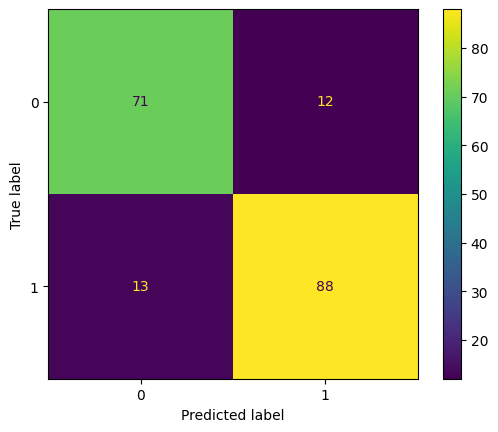

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_SGDC)
ConfusionMatrixDisplay(cm).plot()

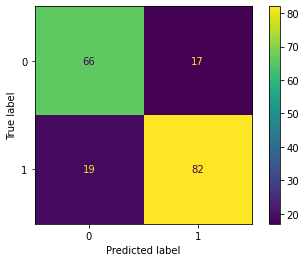

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pred_test)
ConfusionMatrixDisplay(cm).plot()

10. Обучить модель, используя процедуру кросс-валидации с помощью класса LogisticRegressionCV. Предварительно нужно объединить тренировочную и валидационную выборку. Оценить точность модели.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV


In [ ]:
from sklearn.linear_model import LogisticRegressionCV


Test accuracy: 0.804


11. Для оценки точности построить ROC-кривую. Для этого рассчитать предсказанные вероятности по последней модели. Рассчитать значения оценок FPR и TPR с помощью функции roc_curve().

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


Test auc: 0.892


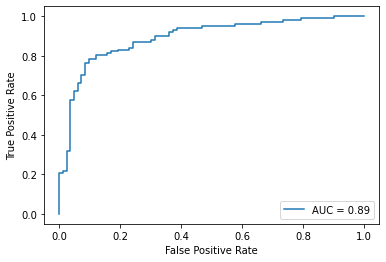

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

